In [57]:
#To demostrate K-Means clutering we would be using the Bank loan prediction data set from Kaggle
#https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/?utm_source=blog&utm_medium=comprehensive-guide-k-means-clustering
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("clustering.csv")

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [60]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
df.isnull().sum().sum()
df = df.dropna()

In [62]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [63]:
def ohe_label_encoding(df,column):
    #Using the label encoder to convert the string values into labels
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
        
    ohe = OneHotEncoder()
    temp_array = ohe.fit_transform(df[[column]]).toarray()    
    column_names= [ column + "_" + str(m) for m in le.classes_ ]   
    

    return( pd.DataFrame(data = temp_array , columns = column_names) ) 

#By this way we can transform a categorical data into machine readable format by using OneHotEncoder of the SkLearn package
#Note the newer versions of SkLearn can automatically convert the categorical data string or other values into OneHotEncodings

In [64]:
categorical = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Property_Area', 'Loan_Status']

numerical = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']


In [65]:
new_numerical = df[numerical]
standardScaler = StandardScaler()
new_numerical = standardScaler.fit_transform(new_numerical)

new_df = pd.DataFrame( new_numerical , columns = numerical)

new_categorical = df[categorical]

for i in categorical:
    new_df = pd.concat( [new_df , ohe_label_encoding(new_categorical,i)] , axis = 1)


C:\Users\Shivansh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shivansh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shivansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Shivansh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, th

In [66]:
new_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.673893,0.091211,0.796898,0.276189,0.413646,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.410365,-0.507947,-1.316653,0.276189,0.413646,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,-0.695985,0.428932,0.524182,0.276189,0.413646,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.644452,-0.507947,1.240062,0.276189,0.413646,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.867220,0.094389,-0.328056,0.276189,0.413646,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [67]:
kmeans = KMeans(n_clusters = 2 )

In [68]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
plt.scatter(new_df[:, 0], new_df[:, 1], s=50);

TypeError: '(slice(None, None, None), 0)' is an invalid key

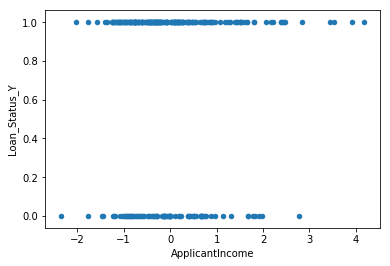

In [75]:
kmeas.n